In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from folium.features import DivIcon

In [3]:
dataset = pd.read_csv('dataset.csv')

In [9]:
dataset.head(20)

,FlightNumber,Date,Flights,Gridfins,Reused,Legs,LandType,LandingPad,LaunchSite,Latitude,Longitude,Block,Serial,ReusedCount,BoosterVersion,PayloadMass,Orbit,payloadName,Outcome
0,1,2006-03-25T10:30:00+12:00,1.0,False,False,False,NaN,NaN,Kwajalein Atoll,9.047721,167.743129,NaN,Merlin1A,0.0,Falcon 1,20.0,LEO,FalconSAT-2,NaN
1,2,2007-03-21T13:10:00+12:00,1.0,False,False,False,NaN,NaN,Kwajalein Atoll,9.047721,167.743129,NaN,Merlin2A,0.0,Falcon 1,NaN,LEO,DemoSAT,NaN
2,3,2008-08-03T15:34:00+12:00,1.0,False,False,False,NaN,NaN,Kwajalein Atoll,9.047721,167.743129,NaN,Merlin1C,0.0,Falcon 1,NaN,NaN,Multi-payloads,NaN
3,4,2008-09-28T11:15:00+12:00,1.0,False,False,False,NaN,NaN,Kwajalein Atoll,9.047721,167.743129,NaN,Merlin2C,0.0,Falcon 1,165.0,LEO,RatSat,NaN
4,5,2009-07-13T15:35:00+12:00,1.0,False,False,False,NaN,NaN,Kwajalein Atoll,9.047721,167.743129,NaN,Merlin3C,0.0,Falcon 1,200.0,LEO,RazakSAT,NaN
5,6,2010-06-04T14:45:00-04:00,1.0,False,False,False,NaN,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B0003,0.0,Falcon 9,NaN,LEO,Dragon Qualification Unit,NaN
6,7,2010-12-08T11:43:00-04:00,1.0,False,False,False,NaN,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B0004,0.0,Falcon 9,NaN,NaN,Multi-payloads,NaN
7,8,2012-05-22T03:44:00-04:00,1.0,False,False,False,NaN,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B0005,0.0,Falcon 9,525.0,LEO,COTS Demo Flight 2,NaN
8,9,2012-10-08T20:35:00-04:00,1.0,False,False,False,NaN,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B0006,0.0,Falcon 9,NaN,NaN,Multi-payloads,NaN
9,10,2013-03-01T15:10:00-04:00,1.0,False,False,False,NaN,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B0007,0.0,Falcon 9,677.0,ISS,CRS-2,NaN


In [5]:
dataset['BoosterVersion'].value_counts()

Falcon 9        180
Falcon 1          5
Falcon Heavy      4
Name: BoosterVersion, dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    189 non-null    int64  
 1   Date            189 non-null    object 
 2   Flights         180 non-null    float64
 3   Gridfins        180 non-null    object 
 4   Reused          180 non-null    object 
 5   Legs            180 non-null    object 
 6   LandType        150 non-null    object 
 7   LandingPad      143 non-null    object 
 8   LaunchSite      189 non-null    object 
 9   Latitude        189 non-null    float64
 10  Longitude       189 non-null    float64
 11  Block           175 non-null    float64
 12  Serial          180 non-null    object 
 13  ReusedCount     180 non-null    float64
 14  BoosterVersion  189 non-null    object 
 15  PayloadMass     141 non-null    float64
 16  Orbit           164 non-null    object 
 17  payloadName     176 non-null    obj

In [6]:
data_rmf1 = dataset[dataset['BoosterVersion']=='Falcon 9']
data_rmf1.shape

(180, 19)

In [7]:
data = data_rmf1.dropna(axis=0, subset='Outcome')

In [25]:
data

,FlightNumber,Date,Flights,Gridfins,Reused,Legs,LandType,LandingPad,LaunchSite,Latitude,Longitude,Block,Serial,ReusedCount,BoosterVersion,PayloadMass,Orbit,payloadName,Outcome
10,11,2013-09-29T09:00:00-07:00,1.0,False,False,False,Ocean,NaN,VAFB SLC 4E,34.632093,-120.610829,1.0,B1003,0.0,Falcon 9,500.0,PO,CASSIOPE,False
13,14,2014-04-18T15:25:00-04:00,1.0,False,False,True,Ocean,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B1006,0.0,Falcon 9,2296.0,ISS,CRS-3,True
14,15,2014-07-14T11:15:00-04:00,1.0,False,False,True,Ocean,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B1007,0.0,Falcon 9,1316.0,LEO,Orbcomm-OG2-M1,True
17,18,2014-09-21T01:52:00-04:00,1.0,False,False,False,Ocean,NaN,CCSFS SLC 40,28.561857,-80.577366,1.0,B1010,0.0,Falcon 9,2216.0,ISS,CRS-4,False
18,19,2015-01-10T05:47:00-04:00,1.0,True,False,True,ASDS,5e9e3032383ecb761634e7cb,CCSFS SLC 40,28.561857,-80.577366,1.0,B1012,0.0,Falcon 9,2395.0,ISS,CRS-5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,2022-07-21T10:13:00-07:00,4.0,True,True,True,ASDS,5e9e3032383ecb6bb234e7ca,VAFB SLC 4E,34.632093,-120.610829,5.0,B1071,3.0,Falcon 9,NaN,NaN,NaN,True
175,176,2022-07-23T20:00:00-04:00,8.0,True,True,True,ASDS,5e9e3033383ecb075134e7cd,CCSFS SLC 40,28.561857,-80.577366,5.0,B1062,7.0,Falcon 9,NaN,NaN,NaN,True
176,177,2022-08-04T19:08:00-04:00,6.0,True,True,True,ASDS,5e9e3033383ecbb9e534e7cc,CCSFS SLC 40,28.561857,-80.577366,5.0,B1052,5.0,Falcon 9,NaN,NaN,NaN,True
177,178,2022-08-09T18:57:00-04:00,3.0,True,True,True,ASDS,5e9e3033383ecb075134e7cd,KSC LC 39A,28.608058,-80.603956,5.0,B1073,2.0,Falcon 9,NaN,NaN,NaN,True


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 10 to 178
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    145 non-null    int64  
 1   Date            145 non-null    object 
 2   Flights         145 non-null    float64
 3   Gridfins        145 non-null    object 
 4   Reused          145 non-null    object 
 5   Legs            145 non-null    object 
 6   LandType        145 non-null    object 
 7   LandingPad      138 non-null    object 
 8   LaunchSite      145 non-null    object 
 9   Latitude        145 non-null    float64
 10  Longitude       145 non-null    float64
 11  Block           145 non-null    float64
 12  Serial          145 non-null    object 
 13  ReusedCount     145 non-null    float64
 14  BoosterVersion  145 non-null    object 
 15  PayloadMass     114 non-null    float64
 16  Orbit           132 non-null    object 
 17  payloadName     137 non-null    ob

In [33]:
data0 = data

In [34]:
data0['PayloadMass'].mean()

8343.672807017543

In [36]:
# data0['LandingPad'].mode()
data0['LandingPad'].mode()[0]

'5e9e3032383ecb6bb234e7ca'

In [37]:
data0['PayloadMass'] = data0['PayloadMass'].fillna(data0['PayloadMass'].mean())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2716\3917299897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['PayloadMass'] = data0['PayloadMass'].fillna(data0['PayloadMass'].mean())


<AxesSubplot:ylabel='PayloadMass'>

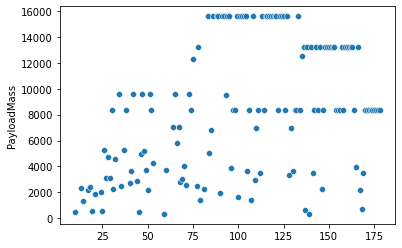

In [38]:
sns.scatterplot(data = data0['PayloadMass'])

In [39]:
data0['LandingPad'] = data0['LandingPad'].fillna(data0['LandingPad'].mode()[0])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2716\949537199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['LandingPad'] = data0['LandingPad'].fillna(data0['LandingPad'].mode()[0])


In [43]:
data0['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    65
5e9e3033383ecbb9e534e7cc    36
5e9e3032383ecb267a34e7c7    18
5e9e3033383ecb075134e7cd    18
5e9e3032383ecb554034e7c9     6
5e9e3032383ecb761634e7cb     2
Name: LandingPad, dtype: int64

In [44]:
data['Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [29]:
data[data['Flights']>1].count()

FlightNumber      100
Date              100
Flights           100
Gridfins          100
Reused            100
Legs              100
LandType          100
LandingPad         98
LaunchSite        100
Latitude          100
Longitude         100
Block             100
Serial            100
ReusedCount       100
BoosterVersion    100
PayloadMass        75
Orbit              88
payloadName        92
Outcome           100
dtype: int64

In [32]:
data[data['Reused']==True].count()

FlightNumber      100
Date              100
Flights           100
Gridfins          100
Reused            100
Legs              100
LandType          100
LandingPad         98
LaunchSite        100
Latitude          100
Longitude         100
Block             100
Serial            100
ReusedCount       100
BoosterVersion    100
PayloadMass        75
Orbit              88
payloadName        92
Outcome           100
dtype: int64

In [8]:
data['Orbit'].value_counts()

VLEO     42
ISS      27
GTO      19
PO       12
LEO      12
SSO      11
MEO       4
GEO       2
ES-L1     1
HEO       1
TLI       1
Name: Orbit, dtype: int64

In [16]:
land = data['LandType'].value_counts()

In [32]:
data['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    58
5e9e3033383ecbb9e534e7cc    36
5e9e3032383ecb267a34e7c7    18
5e9e3033383ecb075134e7cd    18
5e9e3032383ecb554034e7c9     6
5e9e3032383ecb761634e7cb     2
Name: LandingPad, dtype: int64

([<matplotlib.patches.Wedge at 0x197b8768790>,
 [Text(-0.8610750022997139, 0.6845070053801845, 'ASDS'),
  Text(0.7477739653245867, -0.8067428938532671, 'RTLS'),
  Text(1.087373303122057, -0.16619055225080528, 'Ocean')])

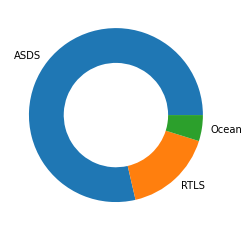

In [21]:
plt.pie(land,labels = land.index,wedgeprops = {'width' : 0.4})

<AxesSubplot:xlabel='count', ylabel='Orbit'>

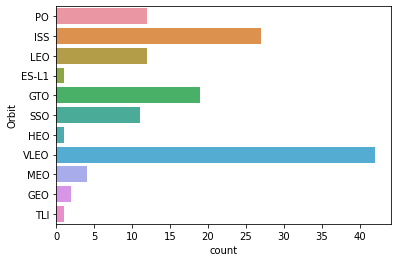

In [11]:
sns.countplot(data = data, y='Orbit')

<AxesSubplot:xlabel='count', ylabel='LandingPad'>

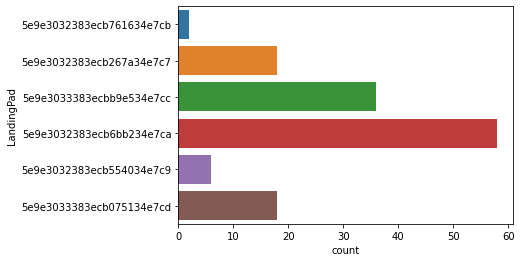

In [30]:
sns.countplot(data = data, y='LandingPad')

In [26]:
data['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    58
5e9e3033383ecbb9e534e7cc    36
5e9e3032383ecb267a34e7c7    18
5e9e3033383ecb075134e7cd    18
5e9e3032383ecb554034e7c9     6
5e9e3032383ecb761634e7cb     2
Name: LandingPad, dtype: int64

In [27]:
data['PayloadMass'].describe()

count      114.000000
mean      8343.672807
std       5723.384323
min        330.000000
25%       2925.500000
50%       7030.000000
75%      13260.000000
max      15600.000000
Name: PayloadMass, dtype: float64

<AxesSubplot:ylabel='PayloadMass'>

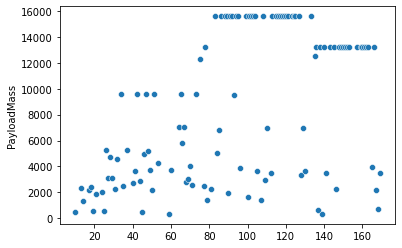

In [29]:
sns.scatterplot(data = data['PayloadMass'])

<AxesSubplot:xlabel='count', ylabel='payloadName'>

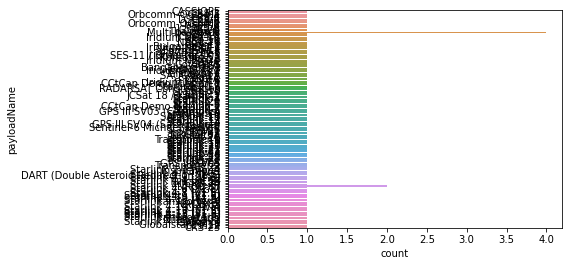

In [22]:
sns.countplot(data = data, y='payloadName')

<AxesSubplot:xlabel='LandType', ylabel='Count'>

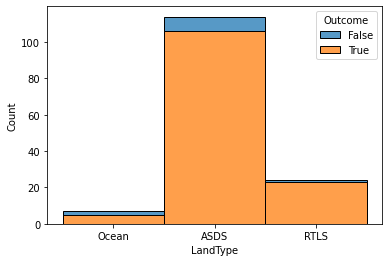

In [13]:
sns.histplot(data=data, x="LandType", hue="Outcome", multiple="stack")

In [51]:
orbit = data[['Orbit','Outcome']]
orbit

,Orbit,Outcome
10,PO,False
13,ISS,True
14,LEO,True
17,ISS,False
18,ISS,False
...,...,...
174,NaN,True
175,NaN,True
176,NaN,True
177,NaN,True


In [74]:
# orbit['Outcome']=orbit['Outcome'].astype('int')

In [64]:
# orbit.apply(pd.value_counts)

In [77]:
orbit.table()

AttributeError: 'DataFrame' object has no attribute 'table'

In [85]:
orbit_outcome = orbit.pivot_table(index=['Orbit'], columns='Outcome', aggfunc='size', fill_value=0)

In [90]:
orbit_outcome

Outcome,0,1
Orbit,,
ES-L1,0,1
GEO,0,2
GTO,1,18
HEO,0,1
ISS,4,23
LEO,0,12
MEO,0,4
PO,2,10
SSO,0,11


<AxesSubplot:xlabel='Orbit', ylabel='Count'>

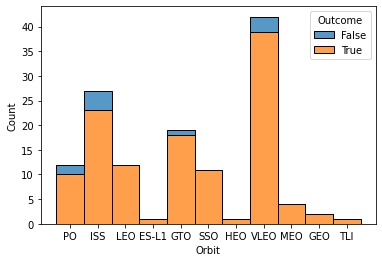

In [94]:
sns.histplot(data=data, x="Orbit", hue="Outcome", multiple="stack")

<AxesSubplot:xlabel='PayloadMass', ylabel='Count'>

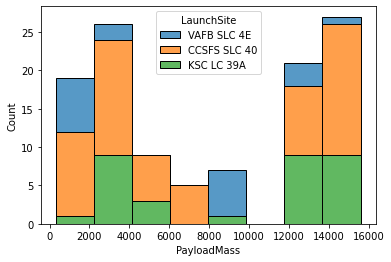

In [93]:
sns.histplot(data=data, x="PayloadMass", hue="LaunchSite", multiple="stack")

In [96]:
data['PayloadMass'].value_counts()

15600.0    27
13260.0    18
9600.0      6
3500.0      3
3681.0      2
           ..
4230.0      1
350.0       1
3750.0      1
7076.0      1
700.0       1
Name: PayloadMass, Length: 62, dtype: int64

In [100]:
data.groupby('Outcome').agg()

In [101]:
dataset['LaunchSite'].value_counts()

CCSFS SLC 40       100
KSC LC 39A          56
VAFB SLC 4E         28
Kwajalein Atoll      5
Name: LaunchSite, dtype: int64

In [102]:
data['LaunchSite'].value_counts()

CCSFS SLC 40    76
KSC LC 39A      45
VAFB SLC 4E     24
Name: LaunchSite, dtype: int64

In [ ]:
sns.barplot

In [149]:
data.pivot_table(index=['LaunchSite'], columns='Outcome', aggfunc='size', fill_value=0)

Outcome,False,True
LaunchSite,,
CCSFS SLC 40,8,68
KSC LC 39A,1,44
VAFB SLC 4E,2,22


In [107]:
data_map = data[['LaunchSite','Latitude','Longitude']]
# data_map

In [114]:
dm = {
    'launchSite':['CCSFS SLC 40','KSC LC 39A','VAFB SLC 4E'],
    'latitude':[28.561857,28.608058,34.644090],
    'longtitude':[-80.577366,-80.603956,-120.593144],
    'times':[76,45,24]
}
data_map = pd.DataFrame(dm)
data_map

,launchSite,latitude,longtitude,times
0,CCSFS SLC 40,28.561857,-80.577366,76
1,KSC LC 39A,28.608058,-80.603956,45
2,VAFB SLC 4E,34.644090,-120.593144,24


In [180]:
dm1 = {
    'launchSite':['CCSFS SLC 40','KSC LC 39A'],
    'latitude':[28.561857,28.608058],
    'longtitude':[-80.577366,-80.603956],
    'times':[76,45]
}
data_map1 = pd.DataFrame(dm1)

In [160]:
map_1 = folium.Map(location = [data_map1['latitude'].mean(),data_map1['longtitude'].mean()],zoom_start = 10,control_scale=True)
map_1

In [181]:
incidents1 = folium.map.FeatureGroup()
for name,row in data_map1.iterrows():
    incidents1.add_child(
        folium.CircleMarker(
            (row['latitude'],row['longtitude']),
            radius=30,
            
        )
#         folium.Mark(
#             (row['latitude'],row['longtitude']),
#         )
        
    )
map_1.add_child(incidents1)
map_1

TypeError: Object of type Icon is not JSON serializable

In [152]:
from folium import plugins

In [183]:
marker_cluster = plugins.MarkerCluster().add_to(map_1)
folium.Marker([28.561857,-80.577366], popup="fail:8").add_to(map_1)
map_1

In [184]:
left_col_color = "#CCCCFF"
right_col_color = "#FFFF99"
html1 = """<!DOCTYPE html>
<html>
<head>
<h4 style="margin-bottom:10"; width="200px">{}</h4>""".format('CCSFS SLC 40') + """
</head>
    <table style="height: 126px; width: 350px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Latitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(28.561857) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Longtitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(-80.577366) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Success times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(68) + """
</tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Fail times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(8) + """
</tr>
</tbody>
</table>
</html>
"""

In [193]:
popup1 = folium.Popup(folium.Html(html1, script=True), max_width=500)

In [194]:
marker_cluster = plugins.MarkerCluster().add_to(map_1)
folium.Marker([28.561857,-80.577366], popup=popup1,icon=folium.Icon(color='#9933CC',icon='none')).add_to(map_1)
map_1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44984\2526138564.py:2: UserWarning: color argument of Icon should be one of: {'lightblue', 'white', 'darkgreen', 'darkblue', 'pink', 'gray', 'cadetblue', 'green', 'darkred', 'black', 'beige', 'orange', 'lightred', 'darkpurple', 'purple', 'lightgreen', 'red', 'lightgray', 'blue'}.
  folium.Marker([28.561857,-80.577366], popup=popup1,icon=folium.Icon(color='#9933CC',icon='none')).add_to(map_1)


In [239]:
map_1 = folium.Map(location = [data_map1['latitude'].mean(),data_map1['longtitude'].mean()],zoom_start = 10,control_scale=True)
folium.CircleMarker(
            (28.561857,-80.577366),
            radius=30,
            color="#9933CC",
).add_to(map_1)
folium.CircleMarker(
            (28.608058,-80.603956),
            radius=30,
            color="#FF99FF",
).add_to(map_1)
map_1

In [240]:
left_col_color = "#CCCCFF"
right_col_color = "#FFFF99"
html1 = """<!DOCTYPE html>
<html>
<head>
<h4 style="margin-bottom:10"; width="200px">{}</h4>""".format('CCSFS SLC 40') + """
</head>
    <table style="height: 126px; width: 350px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Latitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(28.561857) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Longtitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(-80.577366) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Success times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(68) + """
</tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Fail times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(8) + """
</tr>
</tbody>
</table>
</html>
"""

In [241]:
html2 = """<!DOCTYPE html>
<html>
<head>
<h4 style="margin-bottom:10"; width="200px">{}</h4>""".format('KSC LC 39A') + """
</head>
    <table style="height: 126px; width: 350px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Latitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(28.608058) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Longtitude</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(-80.603956) + """
</tr>
<tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Success times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(44) + """
</tr>
<td style="background-color: """+ left_col_color +""";"><span style="color: #ffffff;">Fail times</span></td>
<td style="width: 150px;background-color: """+ right_col_color +""";">{}</td>""".format(1) + """
</tr>
</tbody>
</table>
</html>
"""

In [242]:
popup1 = folium.Popup(folium.Html(html1, script=True), max_width=500)
popup2 = folium.Popup(folium.Html(html2, script=True), max_width=500)

In [243]:
marker_cluster = plugins.MarkerCluster().add_to(map_1)
folium.Marker([28.561857,-80.577366], popup=popup1,icon=folium.Icon(color='darkpurple')).add_to(map_1)
folium.Marker([28.608058,-80.603956], popup=popup2,icon=folium.Icon(color='purple')).add_to(map_1)
map_1

In [244]:
map_1

In [245]:
from folium.plugins import MousePosition
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

map_1.add_child(mouse_position)
map_1

In [ ]:
s = 2 arcsin

In [246]:
from math import sin, cos, sqrt, asin, radians
def haversine_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6371.0

    lat_1 = radians(lat1)
    lon_1 = radians(lon1)
    lat_2 = radians(lat2)
    lon_2 = radians(lon2)

    d_lon = lon_2 - lon_1
    d_lat = lat_2 - lat_1

    a = sin(d_lat / 2)**2 + cos(lat_1) * cos(lat_2) * sin(d_lon / 2)**2
    c = 2 * asin(sqrt(a))

    distance = R * c
    return distance

In [247]:
launch_site_lat = 28.608058
launch_site_lon = -80.603956
coastline_lat = 28.61239
coastline_lon = -80.5986
distance_coastline = haversine_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(distance_coastline,' km')

0.7111337305342595  km


In [248]:
distance_marker = folium.Marker(
   [coastline_lat, coastline_lon],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#FF66CC;"><b>%s</b></div>' % "{:10.2f} km".format(distance_coastline),
       )
   )
map_1.add_child(distance_marker)
coordinates = [[launch_site_lat,launch_site_lon],[coastline_lat,coastline_lon]]
lines=folium.PolyLine(locations=coordinates,color="#FF66CC",weight=2)
map_1.add_child(lines)

In [254]:
filtered_df=data[data['Outcome']==True].groupby(['LaunchSite','Outcome']).size().reset_index(name='class count')
filtered_df

,LaunchSite,Outcome,class count
0,CCSFS SLC 40,True,68
1,KSC LC 39A,True,44
2,VAFB SLC 4E,True,22


In [255]:
filtered_df=data.groupby(['LaunchSite']).size().reset_index(name='class count')
filtered_df

,LaunchSite,class count
0,CCSFS SLC 40,76
1,KSC LC 39A,45
2,VAFB SLC 4E,24


In [260]:
temp = data[data['LaunchSite']== 'CCSFS SLC 40'].groupby(['LaunchSite','Outcome']).size().reset_index(name='class count')
temp

,LaunchSite,Outcome,class count
0,CCSFS SLC 40,False,8
1,CCSFS SLC 40,True,68


In [263]:
temp.replace({False:'Fail'},regex=True, inplace=True)
temp.replace({True:'Success'},regex=True, inplace=True)
temp

,LaunchSite,Outcome,class count
0,CCSFS SLC 40,Fail,8
1,CCSFS SLC 40,True,68


In [258]:
temp[temp['Outcome']== False] = 'fail'

In [259]:
temp

,LaunchSite,Outcome,class count
0,fail,fail,fail
1,CCSFS SLC 40,True,68


In [103]:
import folium